<a href="https://colab.research.google.com/github/jianwen0414/Data-Science-and-Machine-Learning-Projects/blob/main/NASA_%7C_Nearest_Earth_Objects_(1910_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# prompt: read dataset from google drive

import pandas as pd
import numpy as np

# Assuming the dataset is a CSV file named 'data.csv' in the 'My Drive' folder
df = pd.read_csv('/content/drive/My Drive/nearest-earth-objects(1910-2024).csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


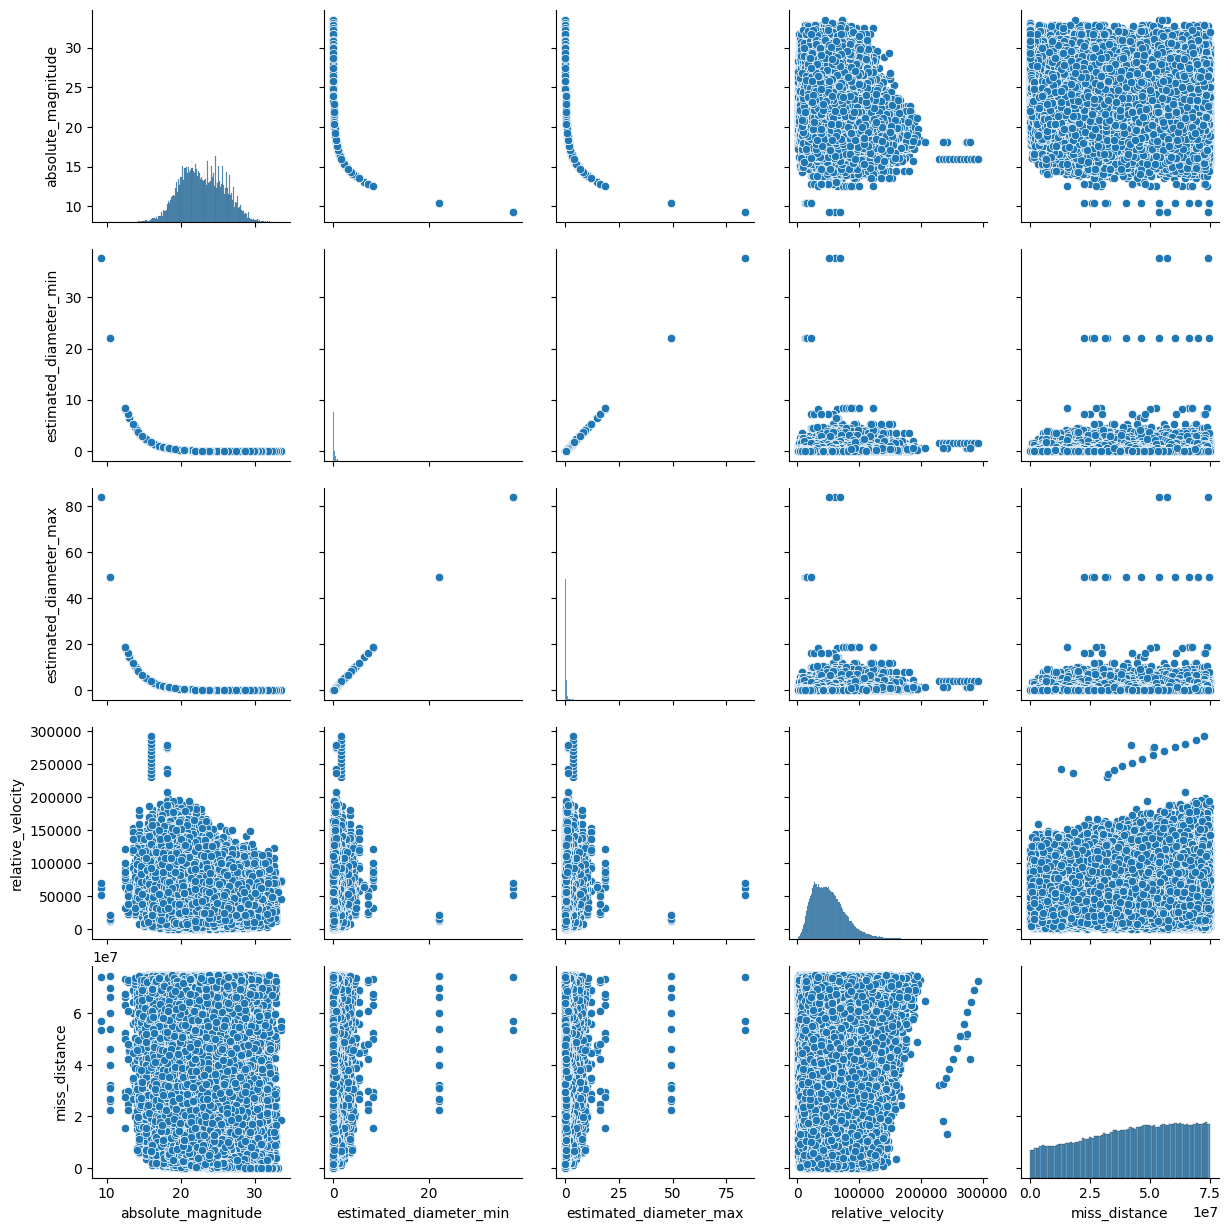

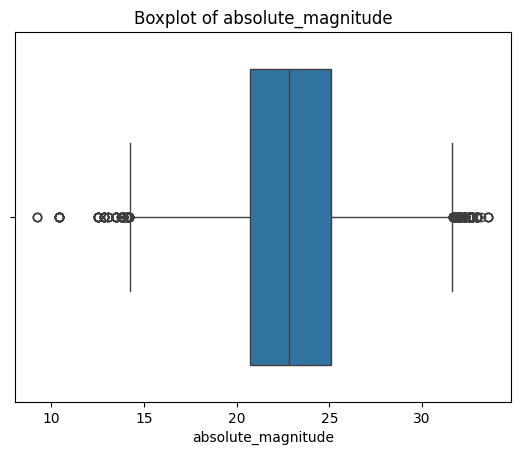

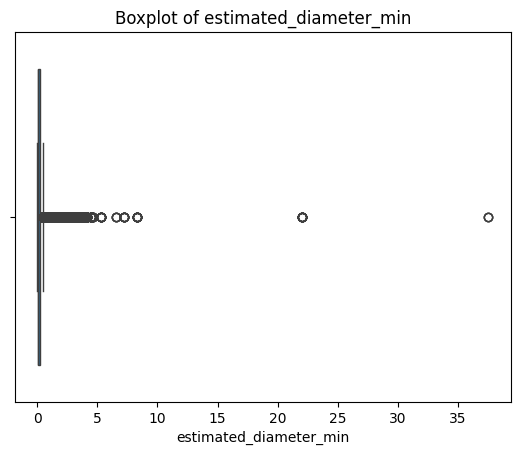

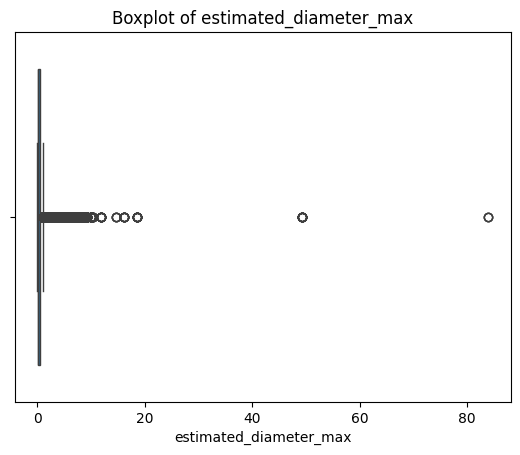

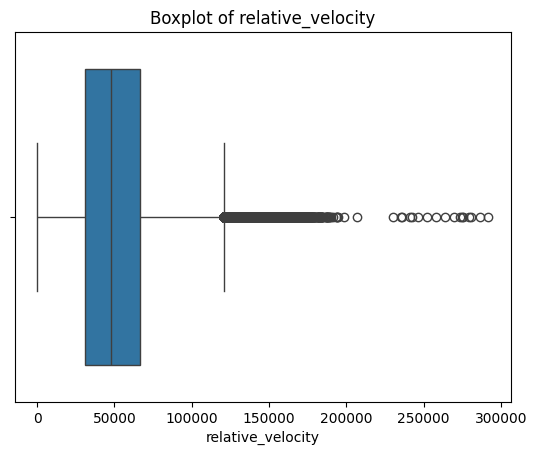

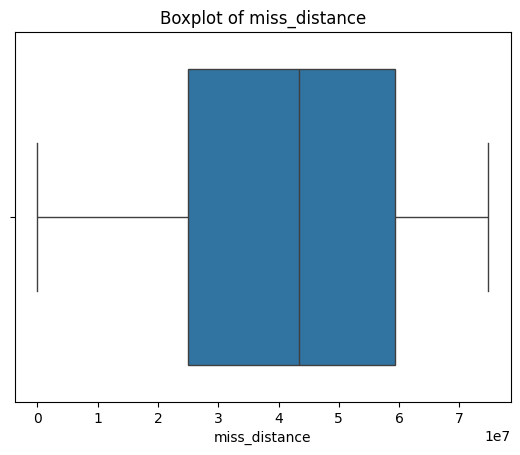

In [ ]:
# prompt: I want to visualize the data except the is_hazardous, neo_id, and name column

import matplotlib.pyplot as plt
import seaborn as sns

# Select columns to visualize (excluding 'is_hazardous', 'neo_id', and 'name')
columns_to_visualize = [col for col in df.columns if col not in ['is_hazardous', 'neo_id', 'name']]

# Pairplot for numerical columns
sns.pairplot(df[columns_to_visualize])
plt.show()

# Boxplots for individual numerical columns
for col in columns_to_visualize:
  if df[col].dtype in ['int64', 'float64']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [ ]:
# prompt: I want to drop the following columns: neo_id, name, orbiting_body

df = df.drop(['neo_id', 'name', 'orbiting_body'], axis=1)
df.head()


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [ ]:
# Check for missing values
print(df.isnull().sum())


absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [ ]:
# Show rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)


        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
107508                 NaN                     NaN                     NaN   
111671                 NaN                     NaN                     NaN   
114171                 NaN                     NaN                     NaN   
116688                 NaN                     NaN                     NaN   
146059                 NaN                     NaN                     NaN   
148836                 NaN                     NaN                     NaN   
150446                 NaN                     NaN                     NaN   
153108                 NaN                     NaN                     NaN   
155973                 NaN                     NaN                     NaN   
186857                 NaN                     NaN                     NaN   
190088                 NaN                     NaN                     NaN   
191131                 NaN                     NaN              

In [ ]:
from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_for_imputation = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])

# Verify the imputation
print(df.isnull().sum())


absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [ ]:
df['average_diameter'] = (df['estimated_diameter_min'] + df['estimated_diameter_max']) / 2

df['diameter_range'] = df['estimated_diameter_max'] - df['estimated_diameter_min']

df['scaled_relative_velocity'] = (df['relative_velocity'] - df['relative_velocity'].min()) / (df['relative_velocity'].max() - df['relative_velocity'].min())

df['log_miss_distance'] = np.log(df['miss_distance'])

df['velocity_diameter_interaction'] = df['relative_velocity'] * df['average_diameter']

df['velocity_distance_ratio'] = df['relative_velocity'] / df['miss_distance']

df['diameter_magnitude_ratio'] = df['average_diameter'] / df['absolute_magnitude']

In [ ]:
# prompt: i want to normalize the data before proceeding to model building\

from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max','relative_velocity','miss_distance']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized data
print(df.head())


   absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0            0.406494                0.010506                0.010506   
1            0.380189                0.014112                0.014112   
2            0.501439                0.003617                0.003617   
3            0.467735                0.005283                0.005283   
4            0.552815                0.002028                0.002028   

   relative_velocity  miss_distance  is_hazardous  average_diameter  \
0           0.245362       0.777315         False          0.639061   
1           0.376388       0.745994          True          0.858109   
2           0.084582       0.898495         False          0.220568   
3           0.269865       0.406323         False          0.321768   
4           0.191486       0.843833         False          0.124035   

   diameter_range  scaled_relative_velocity  log_miss_distance  \
0        0.488200                  0.245362          17.878427   
1 

In [ ]:
# prompt: I want to split the dataset into train and test sets

from sklearn.model_selection import train_test_split

# Assuming 'is_hazardous' is the target variable
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (270559, 12)
X_test shape: (67640, 12)
y_train shape: (270559,)
y_test shape: (67640,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
# Evaluate the model on the test set
accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


Epoch 1/200
529/529 [==============================] - 12s 19ms/step - loss: 0.3338 - binary_accuracy: 0.8495 - val_loss: 0.2561 - val_binary_accuracy: 0.8828
Epoch 2/200
529/529 [==============================] - 11s 20ms/step - loss: 0.2583 - binary_accuracy: 0.8794 - val_loss: 0.2478 - val_binary_accuracy: 0.8832
Epoch 3/200
529/529 [==============================] - 11s 20ms/step - loss: 0.2506 - binary_accuracy: 0.8817 - val_loss: 0.2439 - val_binary_accuracy: 0.8837
Epoch 4/200
529/529 [==============================] - 10s 19ms/step - loss: 0.2474 - binary_accuracy: 0.8830 - val_loss: 0.2439 - val_binary_accuracy: 0.8842
Epoch 5/200
529/529 [==============================] - 9s 17ms/step - loss: 0.2467 - binary_accuracy: 0.8830 - val_loss: 0.2419 - val_binary_accuracy: 0.8844
Epoch 6/200
529/529 [==============================] - 11s 20ms/step - loss: 0.2455 - binary_accuracy: 0.8835 - val_loss: 0.2420 - val_binary_accuracy: 0.8836
Epoch 7/200
529/529 [==========================

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# Define the model
model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05) # Your code here

# Fit the model
model2.fit(X_train, y_train) # Your code here

# Get predictions
predictions = model2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Get predictions and convert them to boolean values
predictions_bool = [round(pred) for pred in predictions]

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions_bool)
print('Accuracy:', accuracy)


Mean Absolute Error: 0.1453197
Accuracy: 0.8968509757539918


In [47]:
# prompt: I want to do a linear regression with is_hazardous as the target column and the rest of the columns as the features, then displays its accuracy

from sklearn.linear_model import LogisticRegression

# Assuming 'is_hazardous' is the target variable
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8690124186871674
